In [1]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

In [2]:
def f(x):
    return x**5-12*x**4+9*x**3+270*x**2-324*x-1944

Коэффициенты полинома:
[ 1.00000000e+00  4.24344353e+05  6.02018373e+10  3.41932172e+15
  6.99486147e+19  8.85537621e+22 -8.73840865e+27 -6.06655582e+31
 -7.21202859e+34  5.33477565e+38  2.21798213e+42  3.44505251e+45
  1.96563656e+48 -8.80869163e+50 -1.85991770e+54 -1.00321713e+57
 -2.24291754e+59 -1.51738243e+61  6.16663420e+62  7.01155580e+64
  5.02167441e+64]
Корни полинома:
[-2.00704000e+05 -1.18125566e+05 -6.42702032e+04 -3.12641909e+04
 -1.27505168e+04  1.08160000e+04  3.65466682e+03 -3.73379420e+03
 -2.03930234e+03 -1.81179209e+03 -1.70095477e+03  8.07384092e+02
 -1.21210285e+03 -8.79117651e+02 -5.54877950e+02 -4.25179355e+02
 -1.20642517e+02 -8.72890204e+01  5.78462428e+01 -7.20850014e-01]


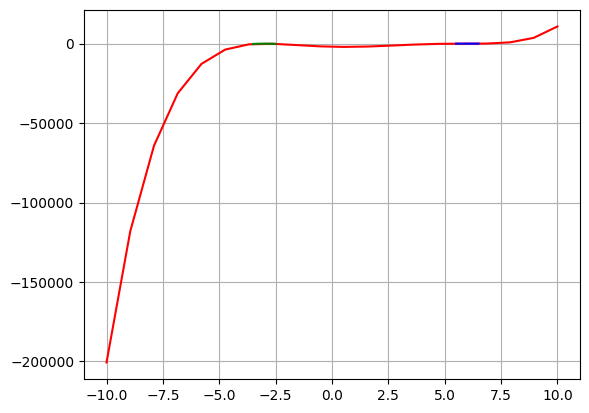

In [3]:
x_n=np.linspace(-10,10,20)
k1=np.linspace (-3.5,-2.5,20) #примерное положение 0 функции
k2=np.linspace (5.5,6.5,20) #примерное положение 0 функции

f1=f(x_n)
f2=f(k1)
f3=f(k2)
p=np.poly(f1)
r=np.roots(p)
print ('Коэффициенты полинома:')
print(p)
print('Корни полинома:')
print (r)
plt.plot(x_n,f1,color='red' )
plt.plot(k1,f2,color='green')
plt.plot(k2,f3,color='blue')
plt.grid()
plt.show()

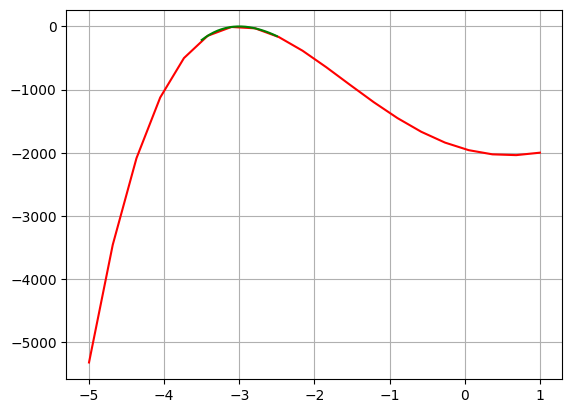

In [4]:
x_n=np.linspace(-5,1,20)
k1=np.linspace (-3.5,-2.5,20)
f1=f(x_n)
f2=f(k1)
plt.plot(x_n,f1,color='red' )
plt.plot(k1,f2,color='green')
plt.grid()
plt.show()

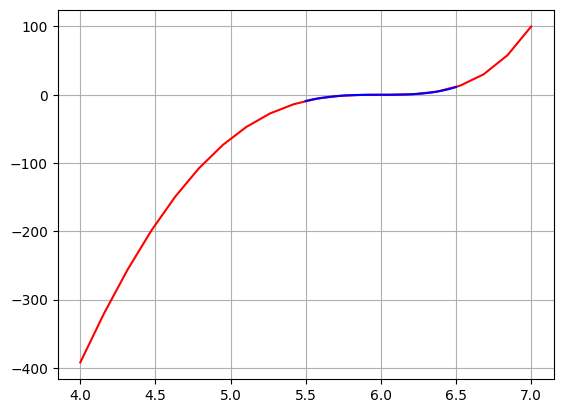

In [5]:
x_n=np.linspace(4,7,20)
k2=np.linspace (5.5,6.5,20)
f1=f(x_n)
f3=f(k2)
plt.plot(x_n,f1,color='red' )
plt.plot(k2,f3,color='blue')
plt.grid()
plt.show()

## Метод дихотомии

In [6]:
 def f(x):
    return x**5-12*x**4+9*x**3+270*x**2-324*x-1944

def bisection_method(a,b,eps=1e-6,max_iter=100):
    if f(a) * f(b) >= 0:
        raise ValueError('Функция должна иметь разные знаки на концах отрезка')
        
    iter_c = 0  #cчётчик итераций
    while (b-a)/2 > eps and iter_c < max_iter:
        c = (a+b)/2  #cередина отрезка
        iter_c += 1
        
        if f(c) == 0:
            return c,iter_c
        elif f(a)*f(c) < 0:
            b = c #корень в левой половине
        else:
            a = c #корень в правой половине

    return (a+b)/2,iter_c #возвр. середину текущего отрезка и кол-во итераций

a = 5.5
b = 6.5
root,iterations = bisection_method(a,b)
print(f'Найденный корень: {root:.6f}')
print(f'Кол-во итераций: {iterations}')

Найденный корень: 6.000000
Кол-во итераций: 1


## Метод Ньютона 

In [7]:
def f(x): return x**5-12*x**4+9*x**3+270*x**2-324*x-1944
def fd(x): return 5*x**4-48*x**3+27*x**2+540*x-324
    
def newton(f,fd,x0,eps=1e-6,max_iter=1000):
    x = x0
    iterations = 0
    for _ in range(max_iter):
        if abs(f(x)) < eps:
            iterations += 1
            break
        if fd(x) == 0:
            break
        x_new = x - f(x)/fd(x)
        if abs(x_new - x) < eps:
            iterations += 1
            break
        x = x_new
        iterations += 1
    return x, iterations

root,iterations = newton(f,fd,x0=-4.0)
print(f'Корень x = {root:.4f} найден за {iterations} итераций')

Корень x = -3.0000 найден за 17 итераций


## Модифицированный метод Ньютона

In [8]:
from sympy import symbols,diff,N,solveset,S

x = symbols('x')
f_expr = x**5-12*x**4+9*x**3+270*x**2-324*x-1944
f = lambda x_val: x_val**5-12*x_val**4+9*x_val**3+270*x_val**2-324*x_val-1944
fd = lambda x_val: 5*x_val**4-48*x_val**3+27*x_val**2+540*x_val-324

roots = []
print('Найденные корни и их кратности:')
for root in solveset(f_expr,x,domain=S.Reals):
    root_val = float(N(root))
    m = 1
    #проверяем кратность корня
    while abs(N(f_expr.diff(x,m).subs(x, root))) < 1e-6:
        m += 1
    roots.append((root_val, m))
    print(f'x = {root_val:.4f}, кратность = {m}')

x0=-4.0
eps=1e-6
max_iter=1000
for iteration in range(max_iter):
    m = min(roots,key=lambda r: abs(r[0] - x0))[1] #находим кратность ближайшего корня 
    #проверка на нулевую производную:
    if abs(fd(x0)) < eps:
        print('\nПроизводная близка к нулю. Метод не применим')
        break
        
    x_new = x0 - m*f(x0)/fd(x0)
    if abs(f(x_new)) < eps: #проверка сходимости
        print(f'\nНайден корень: {x_new:.4f}')
        print(f'Значение функции: {f(x_new):.3e}')
        print(f'Кол-во итераций: {iteration + 1}')
        break

    x0 = x_new
else:
    print('\nМетод не сошелся за указанное число итераций')

Найденные корни и их кратности:
x = -3.0000, кратность = 2
x = 6.0000, кратность = 3

Найден корень: -3.0000
Значение функции: -1.134e-09
Кол-во итераций: 3


## Метод простых итераций для нахождения квадратного корня

In [10]:
eps=1e-6
print('Введите а:')
a = float(input())
print('Введите начальное приближение:')
x = float(input())
max_iter = 100

k = 0  
while k < max_iter:
    x_new = 0.5*(a/x + x)  
    k += 1  
    if abs(x_new - x) < eps:
        print(f'√{a} равен {x_new:.6f} (найдено за {k} итераций)')
        break
    x = x_new  
else:
    print(f'Метод не сошелся за {max_iter} итераций. Последнее приближение: {x_n:.4f}')
        

Введите а:


 4


Введите начальное приближение:


 1


√4.0 равен 2.000000 (найдено за 5 итераций)


## Исследование области сходимости представления x = x^2+x-a

##### Область сходимости: -1<x<0

In [11]:
eps=1e-6
print('Введите а:')
a = float(input())
print('Введите начальное приближение:')
x = float(input())
max_iter = 100

k = 0  
while k < max_iter:
    x_n = x**2+x-a 
    k += 1

    if abs(x_n) > 1e10:  #порог для предотвращения переполнения
        print(f'Метод расходится. Последнее приближение: {x_n:.4f}')
        break
    #проверка условие сходимости:
    if abs(x_n-x) < eps:
        print(f'Корень из {a} равен {x_n:.4f} (найдено за {k} итераций)')
        break

    x = x_n
else:
    print(f'Метод не сошелся за {max_iter} итераций. Последнее приближение: {x_n:.4f}')

Введите а:


 9


Введите начальное приближение:


 1


Метод расходится. Последнее приближение: 1537286295993.0000


In [12]:
#аналог fzero в Phyton, для кратных корней method='newton' 
from scipy.optimize import root_scalar

def f(x): return np.sin(x) + 1
result = root_scalar(f,x0=3,method='newton',fprime=lambda x: np.cos(x))
print(result.root)  

4.71238896330457


# Задание 3

In [13]:
#Поиск корней ур-я sinx=x/2 
def f3(x): return np.sin(x)-x/2
def df3(x): return np.cos(x)-0.5

In [14]:
#Метод Дихотомии(не подходит)
def bisection_method(a,b,eps=1e-6,max_iter=100):
    if f3(a) * f3(b) >= 0:
        raise ValueError('Функция должна иметь разные знаки на концах отрезка')
        
    iter_c = 0  #cчётчик итераций
    while (b-a)/2 > eps and iter_c < max_iter:
        c = (a+b)/2  #cередина отрезка
        iter_c += 1
        
        if f3(c) == 0:
            return c,iter_c
        elif f3(a)*f3(c) < 0:
            b = c #корень в левой половине
        else:
            a = c #корень в правой половине

    return (a+b)/2,iter_c #возвр. середину текущего отрезка и кол-во итераций

a = 0
b = 2*np.pi
root,iterations = bisection_method(a,b)
print(f'Найденный корень: {root:.6f}')
print(f'Кол-во итераций: {iterations}')

ValueError: Функция должна иметь разные знаки на концах отрезка

In [16]:
from sympy import symbols, sin, nsolve, diff, N
import numpy as np

x = symbols('x')
f_expr = sp.sin(x) - x/2
f = lambda x: np.sin(x) - x/2
fd = lambda x: np.cos(x) - 0.5

#находим корни численно, если solveset возвращает ConditionSet
roots = []
#пробуем найти корни в разумном диапазоне
for g in [-2, 0, 2]:
    root = nsolve(f_expr,x,g)
    root_val = float(root)
        
    #определение кратности корня
    m = 1
    while True:
        deriv = diff(f_expr,x,m).subs(x,root)
        if abs(N(deriv)) > 1e-6:
            break
        m += 1
        
    roots.append((root_val,m))
    print(f'Корень {root_val:.5f} имеет кратность {m}')
    
#Модифицированный метод Ньютона
print('\nВведите начальное приближение:')
a = float(input())

def kr(a):
    min_dist = float('inf')
    result_m = 1
    for root,m in roots:
        if abs(a - root) < min_dist:
            min_dist = abs(a - root)
            result_m = m
    return result_m

max_iter = 100
eps = 1e-6
c = 0
while c < max_iter and abs(f(a)) > eps:
    if abs(fd(a)) < eps:
        print('Производная близка к нулю. Метод Ньютона не применим.')
        break
    
    m = kr(a)
    a = a - m*(f(a)/fd(a))
    c += 1
if c < max_iter:
    print(f'Найденный корень: {a:.6f}')
    print(f'Значение функции в корне: {f(a):.2e}')
    print(f'Кол-во итераций: {c}')
else:
    print('Метод Ньютона не сошелся за максимальное количество итераций.')

Корень -1.89549 имеет кратность 1
Корень 0.00000 имеет кратность 1
Корень 1.89549 имеет кратность 1

Введите начальное приближение:


 9


Найденный корень: 1.895494
Значение функции в корне: -1.49e-08
Кол-во итераций: 71
